# Exercise 8

### (a)

Calculate the negative log-likelihood function as a function of the single parameter $\lambda$ and plot
it.

First we write down the likelihood-function of the Poisson distribution.
$L = \prod_{i=1}^3 f(x_i|\lambda) \\$ 
$\rightarrow L_p = \frac{e^{-\lambda} \lambda^{x_i}}{x_i!}$
$\\ ,x_i = \{13,8,9\}$

Now we can calculate the negativ log-likelihood function $l(\lambda)$
$\\ l(\lambda) = - \sum_{i=1}^3 \mathrm{ln}\left(\frac{e^{-\lambda} \lambda^{x_i}}{x_i!}\right)$
$\\ \leftrightarrow l(\lambda) = 3\lambda - \left( \sum_{i=1}^3 x_i \right)\mathrm{ln}(\lambda) + \sum_{i=1}^3 \mathrm{ln}(x_i!)$

<ipython-input-194-01ddd7a3dbd4>:7: RuntimeWarning: divide by zero encountered in log
  return 3*lambda_ -30*np.log(lambda_) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))


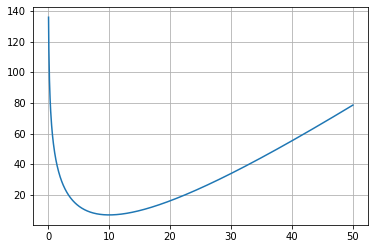

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve as solve


def l(lambda_):
    return 3*lambda_ -30*np.log(lambda_) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))

xx = np.linspace(0,50,1000)

plt.plot(xx,l(xx))
plt.grid()


### (b)

At what value of $\lambda$ is the minimum of l$(\lambda)$?

If we calculate this as a general case with $3\rightarrow n$, we get:

$\frac{\mathrm{d}l}{\mathrm{d}\lambda} = 0 \leftrightarrow n - \left( \sum_{i=1}^n x_i \right)\frac{1}{\lambda} = 0$

$\leftrightarrow \lambda = \frac{\left( \sum_{i=1}^n x_i \right)}{n}$

Hence, $\lambda$ is the arithmetic mean value of $x_i$. In our case with $i = 3$ and the given $x_i$ we get $\lambda = 10$ as a minimum of the negativ loglikelihood function.

### (c)

For which values of $\lambda$ does $l(\lambda)$ take the values:
$l(10) + \frac{1}{2}$,$l(10)+2$,$l(10)+\frac{9}{2}$
and what do these values tell us?


In [195]:
#calculation of the intersection point

intervall = np.linspace(0.1,40,10000)

def sigma(c,rtol):
    temp = intervall[np.isclose(l(intervall), l(10)+c, rtol = rtol)]
    for i in range(5000):
        if(np.abs(l(intervall)[i] - l(intervall)[i+2]) > 0.1):
               return temp[i:i+2]

sigma1 = sigma(1/2,0.0001)
sigma2 = sigma(2,0.0002)
sigma3 = sigma(9/2,0.0003)
print(sigma1,sigma2,sigma3)


[ 8.28430843 11.93951395] [ 6.77992799 14.11029103] [ 5.47506751 16.52049205]


<ipython-input-194-01ddd7a3dbd4>:7: RuntimeWarning: divide by zero encountered in log
  return 3*lambda_ -30*np.log(lambda_) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))


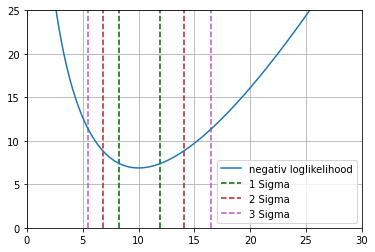

In [196]:
plt.plot(xx,l(xx),label="negativ loglikelihood")
plt.vlines(8.28430843,0,140,linestyles='dashed',label="1 Sigma", color= "darkgreen")
plt.vlines(11.93951395,0,140,linestyles='dashed', color= "darkgreen")
plt.vlines(6.77992799,0,140,linestyles='dashed', color= "firebrick",label="2 Sigma") 
plt.vlines(14.11029103,0,140,linestyles='dashed', color= "firebrick")
plt.vlines(5.47506751,0,140,linestyles='dashed', color= "mediumorchid",label="3 Sigma") 
plt.vlines(16.52049205,0,140,linestyles='dashed', color= "mediumorchid")
plt.ylim(0,25)
plt.xlim(0,30)
plt.grid()
plt.legend()


The calculated values are the intervals of the 1, 2 and 3-$\sigma$-sections.

### d)

Compare these values with the 2nd order Taylor expansion by plotting the approximation together
with the likelihood and by and determining the values from (c). What might the approximation
be useful for?

First we calculate the 2nd order Taylor expansion around the minimum of $l(\lambda)$. Since we do this around the minimum of the negativ loglikelihood function the first order is eqal to zero. 
So we calculate:
$\frac{\partial^2 l(\lambda)}{\partial \lambda^2} = \left( \sum_{i=1}^n x_i \right)\frac{1}{\lambda^2}$
now we can write the Taylor expansion as:
$T_{l}(\lambda) = l(10)+\frac{1}{2}\frac{\partial^2 l(\lambda)}{\partial \lambda_{max}^2}$


In [197]:
print(l(10))

6.881041446128762


$T_{l}(\lambda) = 6.881041446128762+\frac{3}{20}(\lambda - 10)^2$

We calculate the values for c) with:
$T(\lambda) = T(10)+c \leftrightarrow 6.881041446128762+\frac{3}{20}(\lambda - 10)^2 = T(10)+c$
$\leftrightarrow \sqrt{T(10)+c - 6.881041446128762} = \lambda - 10$
$\leftrightarrow \lambda =\sqrt{T(10)+c - 6.881041446128762} + 10 $

In [198]:
def T(lambda_):
    return 6.881041446128762+(3/20)*(lambda_ - 10)**2
def sigmaTp(c):
    return np.sqrt(T(10)+c - 6.881041446128762) + 10
def sigmaTm(c):
    return -np.sqrt(T(10)+c - 6.881041446128762) + 10

sigmaT1m = sigmaTm(1/2)
sigmaT1p = sigmaTp(1/2)
sigmaT2m = sigmaTm(2)
sigmaT2p = sigmaTp(2)
sigmaT3m = sigmaTm(9/2)
sigmaT3p = sigmaTp(9/2)
print(sigmaT1m,sigmaT1p,sigmaT2m,sigmaT2p,sigmaT3m,sigmaT3p)

9.292893218813452 10.707106781186548 8.585786437626904 11.414213562373096 7.878679656440358 12.121320343559642


<ipython-input-194-01ddd7a3dbd4>:7: RuntimeWarning: divide by zero encountered in log
  return 3*lambda_ -30*np.log(lambda_) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))


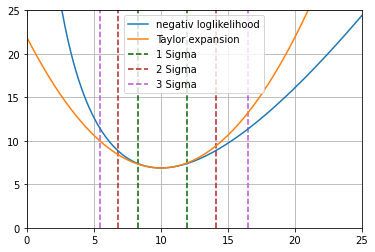

In [199]:
plt.plot(xx,l(xx),label="negativ loglikelihood")
plt.plot(xx,T(xx),label="Taylor expansion")
plt.vlines(8.28430843,0,140,linestyles='dashed',label="1 Sigma", color= "darkgreen")
plt.vlines(11.93951395,0,140,linestyles='dashed', color= "darkgreen")
plt.vlines(6.77992799,0,140,linestyles='dashed', color= "firebrick",label="2 Sigma") 
plt.vlines(14.11029103,0,140,linestyles='dashed', color= "firebrick")
plt.vlines(5.47506751,0,140,linestyles='dashed', color= "mediumorchid",label="3 Sigma") 
plt.vlines(16.52049205,0,140,linestyles='dashed', color= "mediumorchid")
plt.ylim(0,25)
plt.xlim(0,25)
plt.grid()
plt.legend()

As seen in the figure above the 2nd order Taylor expansion is a valid approximation for the 1-sigma section. But after that the error becomes to big for a qualitative approximation.